In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
#df_siren = pd.read_excel('Basesire n.xlsx')
#Om tombe à 2551 siren
#df_localisation= pd.read_excel('localisation.xlsx')
#df_impact= pd.read_excel('Impacts.xlsx')
df_niv1= pd.read_excel('naf2008_liste_n1.xlsx')
df_niv2= pd.read_excel('naf2008_5_niveaux.xlsx')
#un engement en plus...............
#df_engagement= pd.read_excel('engagement.xlsx')

In [155]:
#pip install openpyxl
#pip install seaborn
df_effectif= pd.read_excel('effectif.xlsx')

In [42]:
#df_siren.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146575 entries, 0 to 146574
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   siren                          146575 non-null  int64 
 1   trancheEffectifsUniteLegale    146575 non-null  int64 
 2   categorieEntreprise            145210 non-null  object
 3   denominationUniteLegale        146128 non-null  object
 4   activitePrincipaleUniteLegale  146575 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.6+ MB


In [26]:
#df_siren

,siren,trancheEffectifsUniteLegale,categorieEntreprise,denominationUniteLegale,activitePrincipaleUniteLegale
0,5520325,12,PME,ETABLISSEMENTS ADRIEN RIQUIER,46.74B
1,301592861,12,PME,SOCIETE LOCATELLI,42.12Z
2,302135678,12,PME,GUICHETEAU ANDRE,43.99C
3,303292460,12,PME,SPRING,20.20Z
4,303663173,12,PME,HERAS FRANCE,25.12Z
...,...,...,...,...,...
146570,433952884,12,PME,SAS DE LECLUSE,47.11D
146571,440982759,12,PME,CAROUBE,47.11D
146572,547050609,12,PME,LUCON DISTRIBUTION,47.11D
146573,707050126,12,PME,MANODIS-MANOSQUE DISTRIBUTION,47.11D


In [31]:
#df_localisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48649 entries, 0 to 48648
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   siren        48648 non-null  float64
 1   code_postal  48606 non-null  float64
 2   ville        48626 non-null  object 
 3   num_dept     48605 non-null  float64
 4   departement  48305 non-null  object 
 5   region       48305 non-null  object 
dtypes: float64(3), object(3)
memory usage: 2.2+ MB


In [35]:
#df_localisation

,siren,num_dept,departement,region
0,306979980.0,63.0,Puy-de-DÃ´me,Auvergne-RhÃ´ne-Alpes
1,313552549.0,63.0,Puy-de-DÃ´me,Auvergne-RhÃ´ne-Alpes
2,327125100.0,42.0,Loire,Auvergne-RhÃ´ne-Alpes
3,327377602.0,69.0,RhÃ´ne,Auvergne-RhÃ´ne-Alpes
4,378622534.0,73.0,Savoie,Auvergne-RhÃ´ne-Alpes
...,...,...,...,...
48644,441816766.0,62.0,Pas-de-Calais,Nord-Pas-de-Calais-Picardie
48645,447549320.0,33.0,Gironde,Aquitaine-Limousin-Poitou-Charentes
48646,451744254.0,87.0,Haute-Vienne,Aquitaine-Limousin-Poitou-Charentes
48647,453623779.0,78.0,Yvelines,Ile-de-France


In [198]:
df_localisation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48648 entries, 0 to 48648
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   siren        48648 non-null  int64  
 1   num_dept     48605 non-null  float64
 2   departement  48305 non-null  object 
 3   region       48305 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [48]:
df_localisation.loc[df_localisation['siren'].isnull()]

,siren,num_dept,departement,region
31058,NaN,NaN,NaN,NaN


In [51]:
df_localisation.drop(df_localisation.loc[df_localisation['siren'].isnull()].index, inplace=True)

In [52]:
df_localisation['siren'] = df_localisation['siren'].astype('int')

In [53]:
df_localisation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48648 entries, 0 to 48648
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   siren        48648 non-null  int64  
 1   num_dept     48605 non-null  float64
 2   departement  48305 non-null  object 
 3   region       48305 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [54]:
df_localisation.head(10)

,siren,num_dept,departement,region
0,306979980,63.0,Puy-de-DÃ´me,Auvergne-RhÃ´ne-Alpes
1,313552549,63.0,Puy-de-DÃ´me,Auvergne-RhÃ´ne-Alpes
2,327125100,42.0,Loire,Auvergne-RhÃ´ne-Alpes
3,327377602,69.0,RhÃ´ne,Auvergne-RhÃ´ne-Alpes
4,378622534,73.0,Savoie,Auvergne-RhÃ´ne-Alpes
5,380631275,1.0,Ain,Auvergne-RhÃ´ne-Alpes
6,381044205,63.0,Puy-de-DÃ´me,Auvergne-RhÃ´ne-Alpes
7,383264728,38.0,IsÃ¨re,Auvergne-RhÃ´ne-Alpes
8,385336011,42.0,Loire,Auvergne-RhÃ´ne-Alpes
9,390396349,38.0,IsÃ¨re,Auvergne-RhÃ´ne-Alpes


In [56]:
df_sirenLocalisation = pd.merge(df_siren, df_localisation, how="inner", on="siren" )

In [57]:
df_sirenLocalisation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2685 entries, 0 to 2684
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   siren                          2685 non-null   int64  
 1   trancheEffectifsUniteLegale    2685 non-null   int64  
 2   categorieEntreprise            2667 non-null   object 
 3   denominationUniteLegale        2685 non-null   object 
 4   activitePrincipaleUniteLegale  2685 non-null   object 
 5   num_dept                       2679 non-null   float64
 6   departement                    2657 non-null   object 
 7   region                         2657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 188.8+ KB


In [201]:
df_niv1.head(2)

,Code,Libellé
0,A,Industrie agro-alimentaire
1,B,Industries extractives et manufacturières


In [190]:
df_niv2.head(15)

,NIV5,NIV4,NIV3,NIV2,NIV1
0,01.11Z,1.11,1.1,1,A
1,01.12Z,1.12,1.1,1,A
2,01.13Z,1.13,1.1,1,A
3,01.14Z,1.14,1.1,1,A
4,01.15Z,1.15,1.1,1,A
5,01.16Z,1.16,1.1,1,A
6,01.19Z,1.19,1.1,1,A
7,01.21Z,1.21,1.2,1,A
8,01.22Z,1.22,1.2,1,A
9,01.23Z,1.23,1.2,1,A


In [63]:
df_niv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NIV5    732 non-null    object 
 1   NIV4    732 non-null    float64
 2   NIV3    732 non-null    float64
 3   NIV2    732 non-null    int64  
 4   NIV1    732 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 28.7+ KB


In [64]:
df_niv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Code     21 non-null     object
 1   Libellé  13 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


In [65]:
df_activite = pd.merge(df_niv2, df_niv1, how="left", left_on="NIV1", right_on="Code")

In [230]:
df_activite.head(10)

,NIV5,NIV4,NIV3,NIV2,NIV1,Code,Libellé
0,01.11Z,1.11,1.1,1,A,A,Industrie agro-alimentaire
1,01.12Z,1.12,1.1,1,A,A,Industrie agro-alimentaire
2,01.13Z,1.13,1.1,1,A,A,Industrie agro-alimentaire
3,01.14Z,1.14,1.1,1,A,A,Industrie agro-alimentaire
4,01.15Z,1.15,1.1,1,A,A,Industrie agro-alimentaire
5,01.16Z,1.16,1.1,1,A,A,Industrie agro-alimentaire
6,01.19Z,1.19,1.1,1,A,A,Industrie agro-alimentaire
7,01.21Z,1.21,1.2,1,A,A,Industrie agro-alimentaire
8,01.22Z,1.22,1.2,1,A,A,Industrie agro-alimentaire
9,01.23Z,1.23,1.2,1,A,A,Industrie agro-alimentaire


In [70]:
df_sirenLocalisationActivite = pd.merge(df_sirenLocalisation, df_activite, how="left", left_on="activitePrincipaleUniteLegale", right_on="NIV5" )

In [81]:
df_sirenLocalisationActivite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2551 entries, 0 to 2684
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   siren                          2551 non-null   int64  
 1   trancheEffectifsUniteLegale    2551 non-null   int64  
 2   categorieEntreprise            2533 non-null   object 
 3   denominationUniteLegale        2551 non-null   object 
 4   activitePrincipaleUniteLegale  2551 non-null   object 
 5   num_dept                       2545 non-null   float64
 6   departement                    2525 non-null   object 
 7   region                         2525 non-null   object 
 8   NIV1                           2551 non-null   object 
 9   Libellé                        2551 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 219.2+ KB


In [80]:
#suppression des entreprises qui ne sont des les centres d'activité identifiées
df_sirenLocalisationActivite.drop(['NIV5', 'NIV4', 'NIV3', 'NIV2', 'Code','NIV1'], axis=1, inplace=True)

In [77]:
#augmenter un peu les industries agroalimentaires
df_sirenLocalisationActivite.groupby(['Libellé']).count()

,siren,trancheEffectifsUniteLegale,categorieEntreprise,denominationUniteLegale,activitePrincipaleUniteLegale,num_dept,departement,region,NIV5,NIV4,NIV3,NIV2,NIV1,Code
Libellé,,,,,,,,,,,,,,
Activités de services administratifs et de soutien,117,117,117,117,117,117,114,114,117,117,117,117,117,117
Activités immobilières,14,14,14,14,14,14,14,14,14,14,14,14,14,14
"Activités spécialisées, scientifiques et techniques",140,140,140,140,140,140,140,140,140,140,140,140,140,140
"Commerce de détail, réparation et services personnels",955,955,955,955,955,951,943,943,955,955,955,955,955,955
Construction,396,396,396,396,396,395,394,394,396,396,396,396,396,396
Energie environnement,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Hébergement et restauration,85,85,85,85,85,85,84,84,85,85,85,85,85,85
Industrie agro-alimentaire,18,18,0,18,18,18,18,18,18,18,18,18,18,18
Industries extractives et manufacturières,529,529,529,529,529,529,523,523,529,529,529,529,529,529


In [88]:
def scoreImpact (x,y,z,t):
    if max(x,y,z,t)==x:
        return 1
    if max(x,y,z,t)==y:
        return 2
    if max(x,y,z,t)==z:
        return 3
    if max(x,y,z,t)==t:
        return 4

In [89]:
for i in range(0,len(df_impact)):
    df_impact.at[i,'score_changement-climatique']=scoreImpact(df_impact.at[i,'le changement climatique'],df_impact.at[i,'le changement climatique2'],df_impact.at[i,'le changement climatique3'],df_impact.at[i,'le changement climatique4'])

In [90]:
df_impact

,Secteur,Total,le changement climatique,la perte de la biodiversité,la pollution de l'air,la ressource en eau ou la pollution de l'eau,la pollution des sols,les nuisances sonores,la production de déchets,l'utilisation ou la génération de substances toxiques ou dangereuses,...,l'utilisation ou la génération de substances toxiques ou dangereuses3,le changement climatique4,la perte de la biodiversité4,la pollution de l'air4,la ressource en eau ou la pollution de l'eau4,la pollution des sols4,les nuisances sonores4,la production de déchets4,l'utilisation ou la génération de substances toxiques ou dangereuses4,score_changement-climatique
0,Industrie agro-alimentaire,3176,1589,2234,1742,1221,2292,1576,660,2146,...,149,20,31,11,90,34,0,46,31,1.0
1,Industries extractives et manufacturières,14757,9165,12130,9163,10079,10988,7590,4462,8476,...,920,101,57,44,56,74,44,130,147,1.0
2,Energie environnement,1052,398,752,415,557,598,486,324,588,...,88,52,10,24,76,14,0,112,48,2.0
3,Construction,9956,4596,6893,4558,6106,6093,3275,2068,5033,...,815,176,31,26,44,69,31,239,72,1.0
4,"Commerce de détail, réparation et services per...",11299,6378,8390,6586,7579,7702,7316,3599,7149,...,716,145,93,183,113,148,30,230,109,1.0
5,Commerce de gros,8655,4545,6467,4743,6086,6140,5640,3066,5764,...,542,159,122,89,107,75,26,116,180,1.0
6,Transports et entreposage,6113,1558,3850,1414,3796,3897,2024,2700,3903,...,451,312,26,287,57,74,114,34,23,2.0
7,Hébergement et restauration,5936,3359,4336,3712,3419,4322,3573,1898,4394,...,372,20,43,32,20,23,55,105,22,1.0
8,Information et communication,3802,2854,3445,3098,3355,3463,3265,2628,3387,...,47,23,0,12,0,0,0,0,0,1.0
9,Activités immobilières,1411,723,982,881,932,1050,934,598,1107,...,47,9,12,19,19,19,0,33,7,1.0


In [92]:
for i in range(0,len(df_impact)):
    df_impact.at[i,'score_la perte_de_la_biodiversité']=scoreImpact(df_impact.at[i,'la perte de la biodiversité'],df_impact.at[i,'la perte de la biodiversité2'],df_impact.at[i,'la perte de la biodiversité3'],df_impact.at[i,'la perte de la biodiversité4'])

In [94]:
for i in range(0,len(df_impact)):
    df_impact.at[i,'score_pollution_de_air']=scoreImpact(df_impact.at[i,'la pollution de l\'air'],df_impact.at[i,'la pollution de l\'air2'],df_impact.at[i,'la pollution de l\'air3'],df_impact.at[i,'la pollution de l\'air4'])

In [95]:
for i in range(0,len(df_impact)):
    df_impact.at[i,'score_pollution_eau']=scoreImpact(df_impact.at[i,'la ressource en eau ou la pollution de l\'eau'],df_impact.at[i,'la ressource en eau ou la pollution de l\'eau2'],df_impact.at[i,'la ressource en eau ou la pollution de l\'eau3'],df_impact.at[i,'la ressource en eau ou la pollution de l\'eau4'])

In [96]:
for i in range(0,len(df_impact)):
    df_impact.at[i,'score_pollution_sols']=scoreImpact(df_impact.at[i,'la pollution des sols'],df_impact.at[i,'la pollution des sols2'],df_impact.at[i,'la pollution des sols3'],df_impact.at[i,'la pollution des sols4'])

In [97]:
for i in range(0,len(df_impact)):
    df_impact.at[i,'score_la production_déchets']=scoreImpact(df_impact.at[i,'la production de déchets'],df_impact.at[i,'la production de déchets2'],df_impact.at[i,'la production de déchets3'],df_impact.at[i,'la production de déchets4'])

In [98]:
for i in range(0,len(df_impact)):
    df_impact.at[i,'score_substances_toxiques_dangereuses']=scoreImpact(df_impact.at[i,'l\'utilisation ou la génération de substances toxiques ou dangereuses'],df_impact.at[i,'l\'utilisation ou la génération de substances toxiques ou dangereuses2'],df_impact.at[i,'l\'utilisation ou la génération de substances toxiques ou dangereuses3'],df_impact.at[i,'l\'utilisation ou la génération de substances toxiques ou dangereuses4'])

In [101]:
for i in range(0,len(df_impact)):
    df_impact.at[i,'score_nuisances_sonores']=scoreImpact(df_impact.at[i,'les nuisances sonores'],df_impact.at[i,'les nuisances sonores2'],df_impact.at[i,'les nuisances sonores3'],df_impact.at[i,'les nuisances sonores4'])

In [192]:
df_impact[['Secteur','score_changement-climatique','score_la perte_de_la_biodiversité','score_pollution_de_air','score_pollution_eau','score_pollution_sols','score_la production_déchets','score_substances_toxiques_dangereuses','score_nuisances_sonores']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Secteur                                12 non-null     object 
 1   score_changement-climatique            12 non-null     float64
 2   score_la perte_de_la_biodiversité      12 non-null     float64
 3   score_pollution_de_air                 12 non-null     float64
 4   score_pollution_eau                    12 non-null     float64
 5   score_pollution_sols                   12 non-null     float64
 6   score_la production_déchets            12 non-null     float64
 7   score_substances_toxiques_dangereuses  12 non-null     float64
 8   score_nuisances_sonores                12 non-null     float64
dtypes: float64(8), object(1)
memory usage: 992.0+ bytes


In [194]:
df_impact[['Secteur','score_changement-climatique','score_la perte_de_la_biodiversité','score_pollution_de_air','score_pollution_eau','score_pollution_sols','score_la production_déchets','score_substances_toxiques_dangereuses','score_nuisances_sonores']].head(15)

,Secteur,score_changement-climatique,score_la perte_de_la_biodiversité,score_pollution_de_air,score_pollution_eau,score_pollution_sols,score_la production_déchets,score_substances_toxiques_dangereuses,score_nuisances_sonores
0,Industrie agro-alimentaire,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
1,Industries extractives et manufacturières,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
2,Energie environnement,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
3,Construction,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0
4,"Commerce de détail, réparation et services per...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
5,Commerce de gros,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
6,Transports et entreposage,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0
7,Hébergement et restauration,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
8,Information et communication,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,Activités immobilières,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [103]:
df_impact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 42 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Secteur                                                                12 non-null     object 
 1   Total                                                                  12 non-null     int64  
 2   le changement climatique                                               12 non-null     int64  
 3   la perte de la biodiversité                                            12 non-null     int64  
 4   la pollution de l'air                                                  12 non-null     int64  
 5   la ressource en eau ou la pollution de l'eau                           12 non-null     int64  
 6   la pollution des sols                                                  12 non-null     int64

In [106]:
df_sirenLocalisationActiviteImpact = pd.merge(df_sirenLocalisationActivite, df_impact[['Secteur','score_changement-climatique','score_la perte_de_la_biodiversité','score_pollution_de_air','score_pollution_eau','score_pollution_sols','score_la production_déchets','score_substances_toxiques_dangereuses','score_nuisances_sonores']], how="left", left_on="Libellé", right_on="Secteur" )

In [107]:
df_sirenLocalisationActiviteImpact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2551 entries, 0 to 2550
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   siren                                  2551 non-null   int64  
 1   trancheEffectifsUniteLegale            2551 non-null   int64  
 2   categorieEntreprise                    2533 non-null   object 
 3   denominationUniteLegale                2551 non-null   object 
 4   activitePrincipaleUniteLegale          2551 non-null   object 
 5   num_dept                               2545 non-null   float64
 6   departement                            2525 non-null   object 
 7   region                                 2525 non-null   object 
 8   NIV1                                   2551 non-null   object 
 9   Libellé                                2551 non-null   object 
 10  Secteur                                2551 non-null   object 
 11  scor

In [111]:
df_engagement

,Libellé,Produits ou services écolabellisés,Certification environnementale sur procédé de production,Ecoproduits,Démarche d'amélioration de l'efficacité énergétique,"Gestion économe des ressources (matières premières, eau)",Implication dans la préservation de la biodiversité1
0,Énergie et environnement,3,63,30,58,68,55
1,Transports et entreposage,3,20,24,53,50,15
2,Activités immobilières,13,14,28,44,43,18
3,Industrie agroalimentaire,5,24,23,41,69,29
4,Hébergement et restauration,7,11,25,37,61,30
5,Industries extractives et manufacturières,7,29,26,33,58,17
6,Commerce de gros,13,17,28,30,40,17
7,Construction,8,18,21,29,40,26
8,"Commerce de détail, réparation et services per...",10,8,24,26,39,15
9,"Activités spécialisées, scientifiques et techn...",4,13,13,24,36,14


In [195]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Libellé                                                   12 non-null     object
 1   Produits ou services écolabellisés                        12 non-null     int64 
 2   Certification environnementale sur procédé de production  12 non-null     int64 
 3   Ecoproduits                                               12 non-null     int64 
 4   Démarche d'amélioration de l'efficacité énergétique       12 non-null     int64 
 5   Gestion économe des ressources (matières premières, eau)  12 non-null     int64 
 6   Implication dans la préservation de la biodiversité1      12 non-null     int64 
 7   score_ecolabel                                            12 non-null     int64 
 8   score_certificationEnvironementa

In [115]:
def scoreEngagement (x):
    if x<=25:
        return 1
    if x<=50:
        return 2
    if x<=75:
        return 3
    if x<=100:
        return 4

In [140]:
df_engagement['score_ecolabel']=df_engagement['Produits ou services écolabellisés'].apply(scoreEngagement)

In [141]:
df_engagement['score_certificationEnvironementale']=df_engagement['Certification environnementale sur procédé de production'].apply(scoreEngagement)

In [142]:
df_engagement['score_ecoproduit']=df_engagement['Ecoproduits'].apply(scoreEngagement)

In [143]:
df_engagement['score_ameliorationEfficaciteEnergetique']=df_engagement['Démarche d\'amélioration de l\'efficacité énergétique'].apply(scoreEngagement)

In [144]:
df_engagement['score_gestionRessources']=df_engagement['Gestion économe des ressources (matières premières, eau)'].apply(scoreEngagement)

In [145]:
df_engagement['score_preservationBiodiversite']=df_engagement['Implication dans la préservation de la biodiversité1'].apply(scoreEngagement)

In [146]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Libellé                                                   12 non-null     object
 1   Produits ou services écolabellisés                        12 non-null     int64 
 2   Certification environnementale sur procédé de production  12 non-null     int64 
 3   Ecoproduits                                               12 non-null     int64 
 4   Démarche d'amélioration de l'efficacité énergétique       12 non-null     int64 
 5   Gestion économe des ressources (matières premières, eau)  12 non-null     int64 
 6   Implication dans la préservation de la biodiversité1      12 non-null     int64 
 7   score_ecolabel                                            12 non-null     int64 
 8   score_certificationEnvironementa

In [196]:
df_engagement[['Libellé','score_ecolabel','score_certificationEnvironementale','score_ecoproduit','score_ameliorationEfficaciteEnergetique','score_gestionRessources','score_preservationBiodiversite']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Libellé                                  12 non-null     object
 1   score_ecolabel                           12 non-null     int64 
 2   score_certificationEnvironementale       12 non-null     int64 
 3   score_ecoproduit                         12 non-null     int64 
 4   score_ameliorationEfficaciteEnergetique  12 non-null     int64 
 5   score_gestionRessources                  12 non-null     int64 
 6   score_preservationBiodiversite           12 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 800.0+ bytes


In [147]:
df_sirenLocalisationActiviteImpactEngagement = pd.merge(df_sirenLocalisationActiviteImpact, df_engagement[['Libellé','score_ecolabel','score_certificationEnvironementale','score_ecoproduit','score_ameliorationEfficaciteEnergetique','score_gestionRessources','score_preservationBiodiversite']], how="left", on="Libellé" )

In [148]:
df_sirenLocalisationActiviteImpactEngagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2551 entries, 0 to 2550
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   siren                                    2551 non-null   int64  
 1   trancheEffectifsUniteLegale              2551 non-null   int64  
 2   categorieEntreprise                      2533 non-null   object 
 3   denominationUniteLegale                  2551 non-null   object 
 4   activitePrincipaleUniteLegale            2551 non-null   object 
 5   num_dept                                 2545 non-null   float64
 6   departement                              2525 non-null   object 
 7   region                                   2525 non-null   object 
 8   NIV1                                     2551 non-null   object 
 9   Libellé                                  2551 non-null   object 
 10  Secteur                                  2551 no

In [138]:
df_sirenLocalisationActiviteImpactEngagement.loc[df_sirenLocalisationActiviteImpactEngagement['score_ecolabel'].isnull()]

,siren,trancheEffectifsUniteLegale,categorieEntreprise,denominationUniteLegale,activitePrincipaleUniteLegale,num_dept,departement,region,NIV1,Libellé,...,score_pollution_sols,score_la production_déchets,score_substances_toxiques_dangereuses,score_nuisances_sonores,score_ecolabel,score_certificationEnvironementale,score_ecoproduit,score_ameliorationEfficaciteEnergetique,score_gestionRessources,score_preservationBiodiversite
27,324716653,12,PME,DHESDIN SA,38.32Z,62.0,Pas-de-Calais,Nord-Pas-de-Calais-Picardie,E,Energie environnement,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
360,751414558,12,PME,PRO AMIANTE,39.00Z,71.0,SaÃ´ne-et-Loire,Bourgogne-Franche-ComtÃ©,E,Energie environnement,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
484,726620222,12,PME,PASSARD,38.32Z,71.0,SaÃ´ne-et-Loire,Bourgogne-Franche-ComtÃ©,E,Energie environnement,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
706,395393440,12,PME,SOCIETE GUY PRADAT RECYCLAGE,38.32Z,35.0,Ille-et-Vilaine,Bretagne,E,Energie environnement,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
823,510764335,21,GE,GAZ DE PARIS,35.23Z,92.0,Hauts-de-Seine,Ile-de-France,D,Energie environnement,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
858,838924645,21,ETI,STLG RECYCLAGE,38.32Z,77.0,Seine-et-Marne,Ile-de-France,E,Energie environnement,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
884,520335860,21,ETI,RECYCLEA,38.32Z,3.0,Allier,Auvergne-RhÃ´ne-Alpes,E,Energie environnement,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1311,747220358,21,PME,SCAVI,37.00Z,73.0,Savoie,Auvergne-RhÃ´ne-Alpes,E,Energie environnement,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1344,509198412,22,PME,E.V.E. ENVIRONNEMENT VALORISATION EMPLOI,38.32Z,3.0,Allier,Auvergne-RhÃ´ne-Alpes,E,Energie environnement,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1558,394875934,12,PME,ETS GRANDIDIER,38.32Z,88.0,Vosges,Alsace-Champagne-Ardenne-Lorraine,E,Energie environnement,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df_effectif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   NN        15 non-null     int64 
 1   effectif  15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [157]:
df = pd.merge(df_sirenLocalisationActiviteImpactEngagement, df_effectif, how="left", left_on="trancheEffectifsUniteLegale",right_on="NN" )

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2551 entries, 0 to 2550
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   siren                                    2551 non-null   int64  
 1   trancheEffectifsUniteLegale              2551 non-null   int64  
 2   categorieEntreprise                      2533 non-null   object 
 3   denominationUniteLegale                  2551 non-null   object 
 4   activitePrincipaleUniteLegale            2551 non-null   object 
 5   num_dept                                 2545 non-null   float64
 6   departement                              2525 non-null   object 
 7   region                                   2525 non-null   object 
 8   NIV1                                     2551 non-null   object 
 9   Libellé                                  2551 non-null   object 
 10  Secteur                                  2551 no

In [159]:
df.drop('NN', axis=1, inplace=True)

In [173]:
df['score_pollution_sols'] = df['score_pollution_sols'].astype('int')

In [174]:
corr_df = df.corr(method='pearson')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2551 entries, 0 to 2550
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   siren                                    2551 non-null   int64  
 1   trancheEffectifsUniteLegale              2551 non-null   int64  
 2   categorieEntreprise                      2533 non-null   object 
 3   denominationUniteLegale                  2551 non-null   object 
 4   activitePrincipaleUniteLegale            2551 non-null   object 
 5   num_dept                                 2545 non-null   float64
 6   departement                              2525 non-null   object 
 7   region                                   2525 non-null   object 
 8   NIV1                                     2551 non-null   object 
 9   Libellé                                  2551 non-null   object 
 10  Secteur                                  2551 no

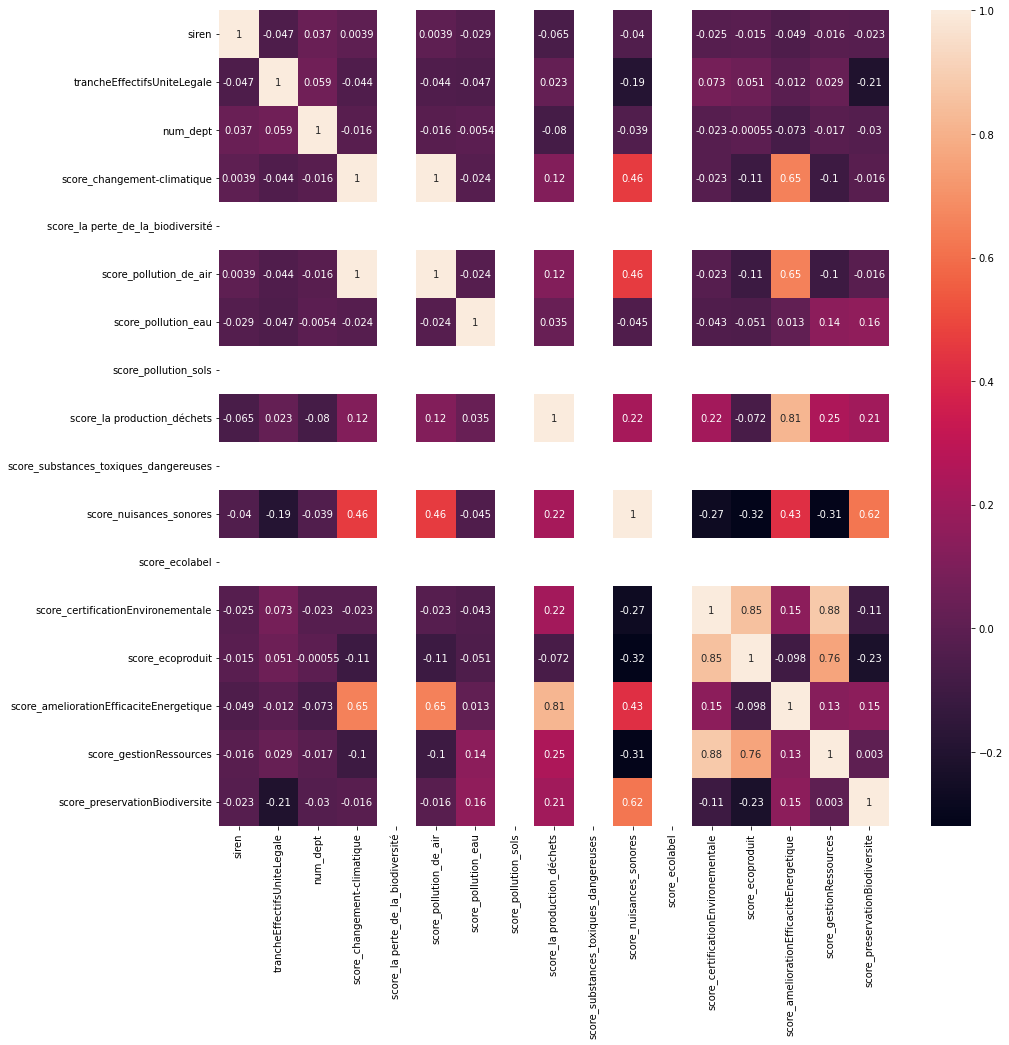

In [176]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

In [177]:
corr_df.style.background_gradient(cmap='coolwarm')

/home/s10/.venv/challenge/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/s10/.venv/challenge/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,siren,trancheEffectifsUniteLegale,num_dept,score_changement-climatique,score_la perte_de_la_biodiversité,score_pollution_de_air,score_pollution_eau,score_pollution_sols,score_la production_déchets,score_substances_toxiques_dangereuses,score_nuisances_sonores,score_ecolabel,score_certificationEnvironementale,score_ecoproduit,score_ameliorationEfficaciteEnergetique,score_gestionRessources,score_preservationBiodiversite
siren,1.000000,-0.046902,0.037230,0.003945,nan,0.003945,-0.029488,nan,-0.064914,nan,-0.039976,nan,-0.024692,-0.014534,-0.048715,-0.016124,-0.022676
trancheEffectifsUniteLegale,-0.046902,1.000000,0.059293,-0.044271,nan,-0.044271,-0.047431,nan,0.023109,nan,-0.189408,nan,0.072513,0.051305,-0.012281,0.028512,-0.208905
num_dept,0.037230,0.059293,1.000000,-0.015742,nan,-0.015742,-0.005377,nan,-0.080255,nan,-0.038805,nan,-0.022564,-0.000546,-0.073085,-0.016953,-0.029572
score_changement-climatique,0.003945,-0.044271,-0.015742,1.000000,nan,1.000000,-0.023503,nan,0.117367,nan,0.461805,nan,-0.023261,-0.109238,0.649915,-0.103719,-0.015935
score_la perte_de_la_biodiversité,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
score_pollution_de_air,0.003945,-0.044271,-0.015742,1.000000,nan,1.000000,-0.023503,nan,0.117367,nan,0.461805,nan,-0.023261,-0.109238,0.649915,-0.103719,-0.015935
score_pollution_eau,-0.029488,-0.047431,-0.005377,-0.023503,nan,-0.023503,1.000000,nan,0.035486,nan,-0.044861,nan,-0.043217,-0.050667,0.013354,0.144312,0.157789
score_pollution_sols,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
score_la production_déchets,-0.064914,0.023109,-0.080255,0.117367,nan,0.117367,0.035486,nan,1.000000,nan,0.224018,nan,0.215812,-0.072228,0.814545,0.245897,0.208113
score_substances_toxiques_dangereuses,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


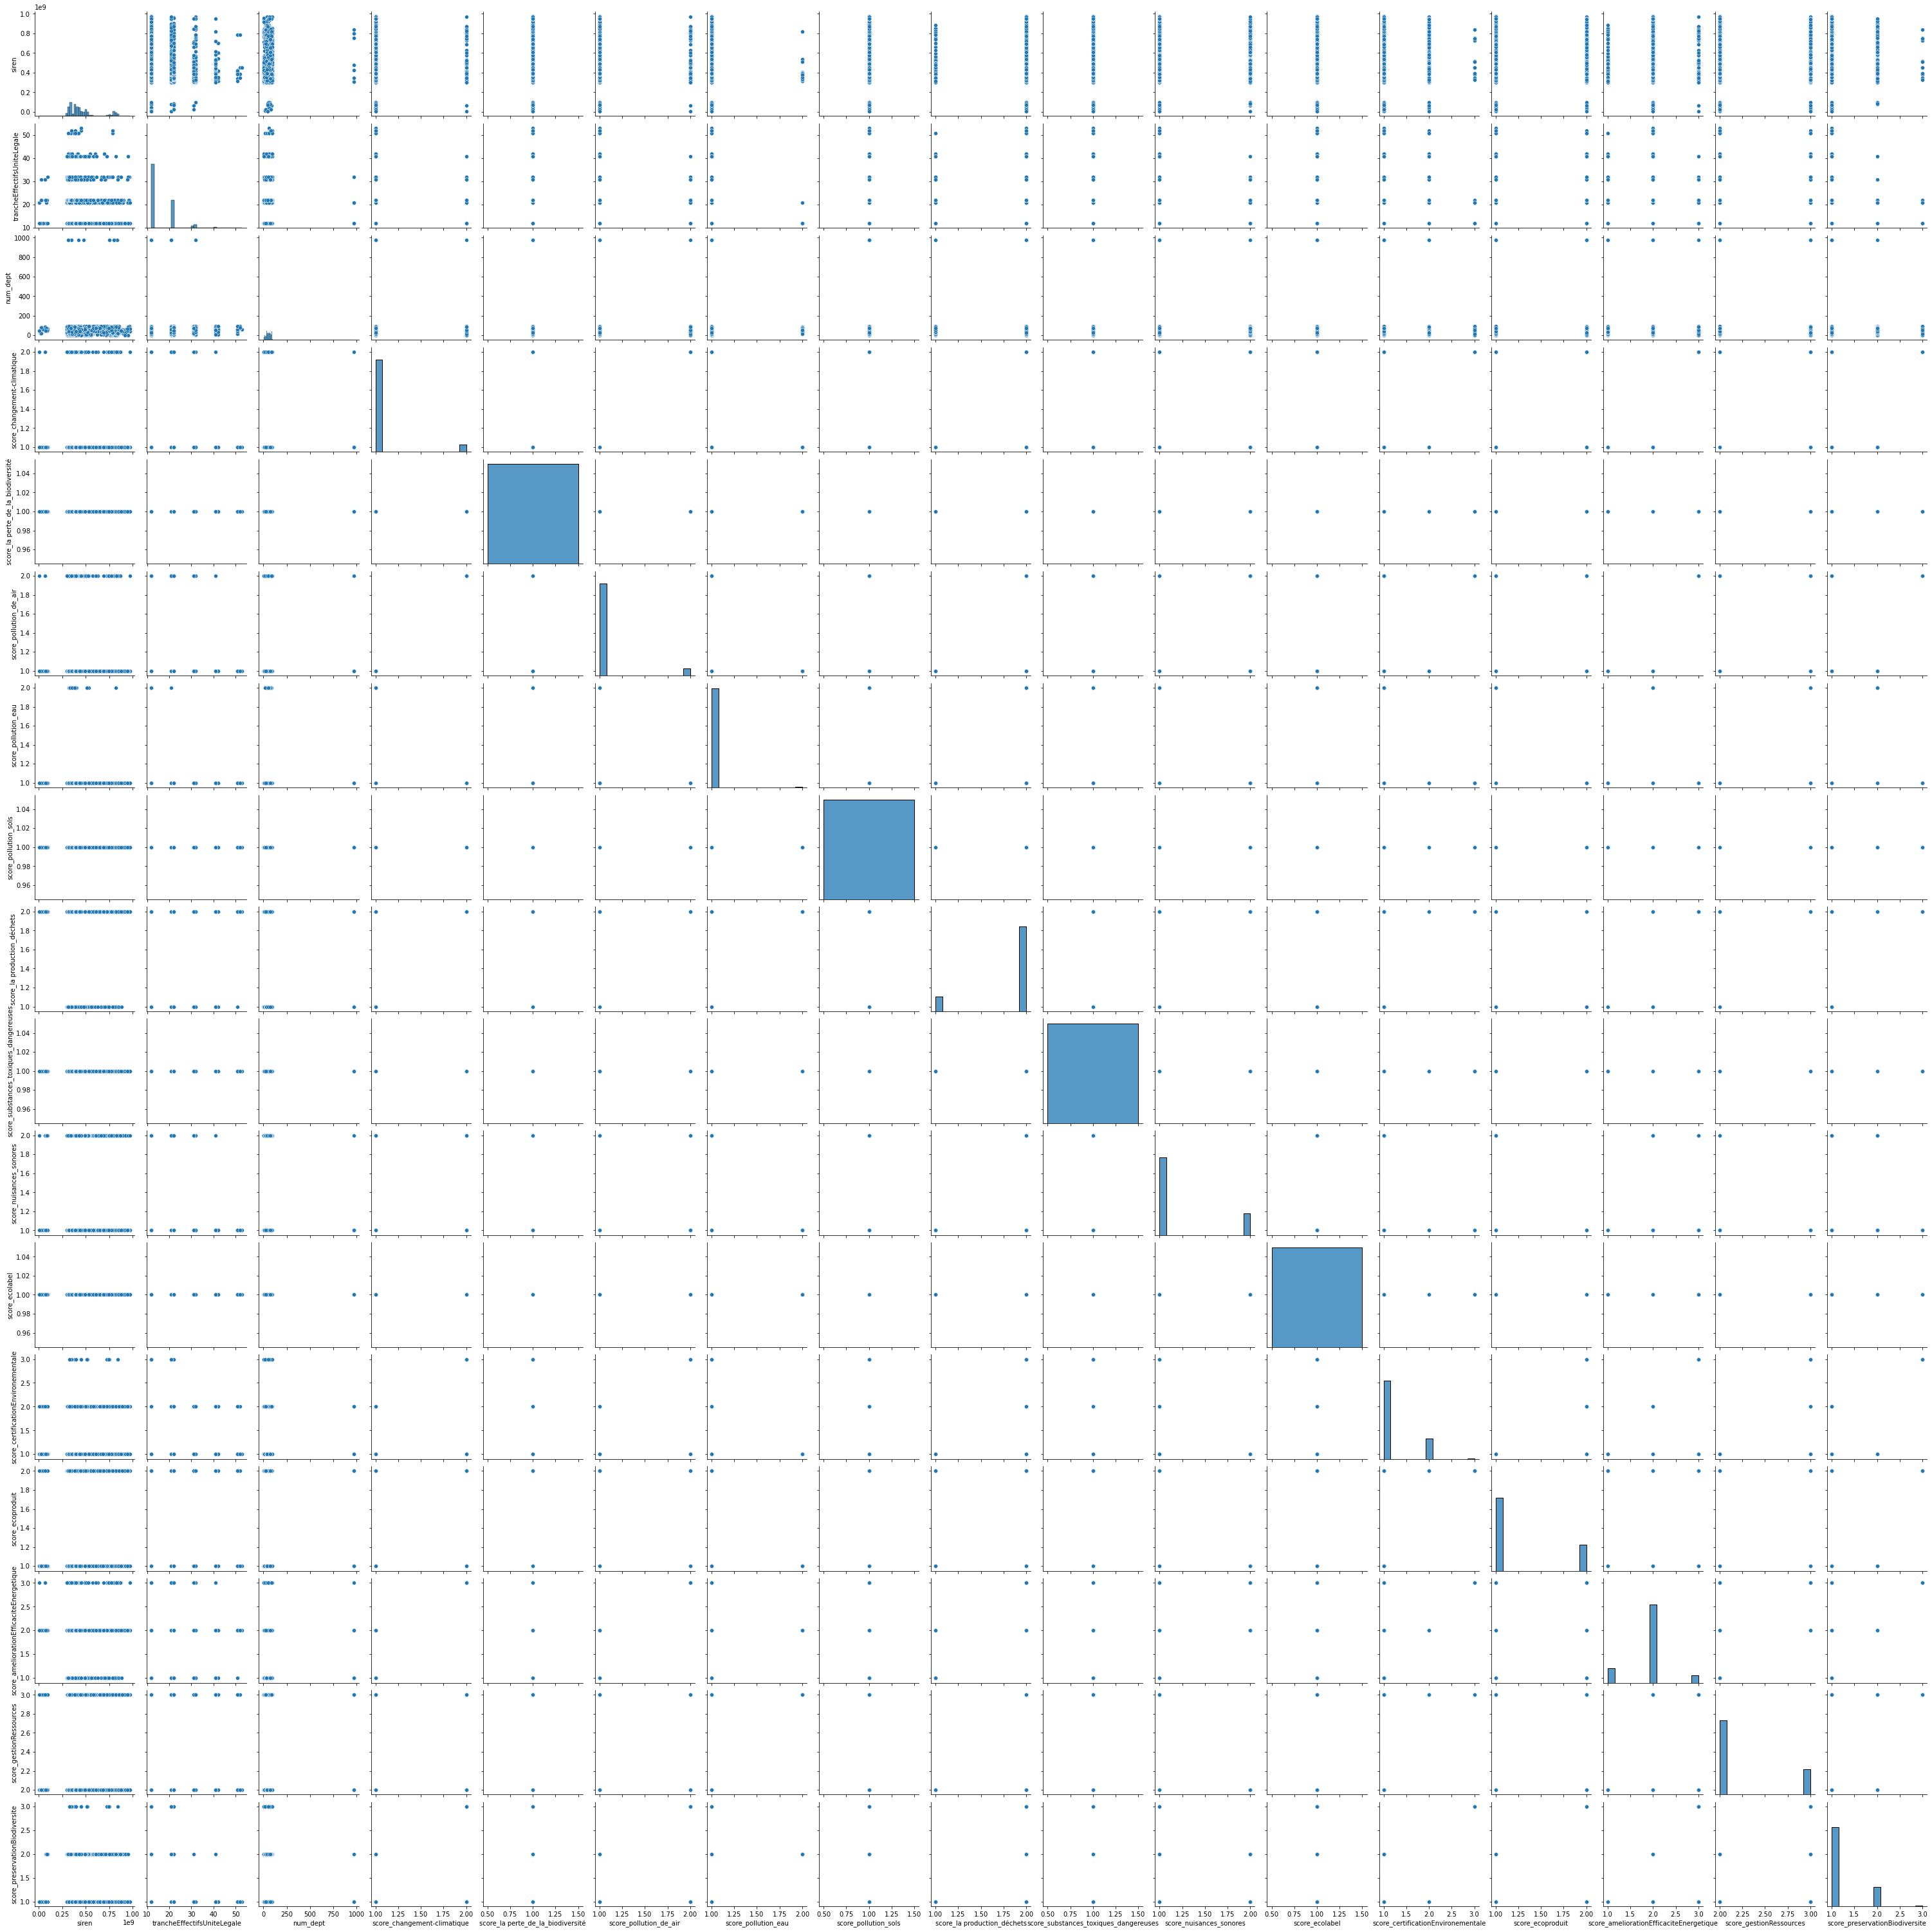

In [185]:
sns.pairplot(df)

In [186]:
df.to_csv('finalchallenge.csv')

In [231]:
df_final= pd.read_excel('Final_dataset.xlsx')

In [232]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   siren                                    2507 non-null   int64 
 1   denominationUniteLegale                  2507 non-null   object
 2   effectif                                 2507 non-null   object
 3   categorieEntreprise                      2507 non-null   object
 4   Secteur                                  2507 non-null   object
 5   num_dept                                 2507 non-null   int64 
 6   departement                              2507 non-null   object
 7   region                                   2507 non-null   object
 8   score_changement_climatique              2507 non-null   int64 
 9   score_la perte_de_la_biodiversité        2507 non-null   int64 
 10  score_pollution_de_air                   2507 non-null   int

In [236]:
df_tran=df_final[['Secteur','score_changement_climatique','score_la perte_de_la_biodiversité','score_pollution_de_air','score_pollution_eau','score_pollution_sols','score_la production_déchets','score_substances_toxiques_dangereuses','score_nuisances_sonores','score_impact_global','impact_global']][:12]

In [237]:
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Secteur                                12 non-null     object
 1   score_changement_climatique            12 non-null     int64 
 2   score_la perte_de_la_biodiversité      12 non-null     int64 
 3   score_pollution_de_air                 12 non-null     int64 
 4   score_pollution_eau                    12 non-null     int64 
 5   score_pollution_sols                   12 non-null     int64 
 6   score_la production_déchets            12 non-null     int64 
 7   score_substances_toxiques_dangereuses  12 non-null     int64 
 8   score_nuisances_sonores                12 non-null     int64 
 9   score_impact_global                    12 non-null     int64 
 10  impact_global                          12 non-null     object
dtypes: int64(9), object(2